Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data preparation

In [20]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'hour_of_day', 'day_of_week', 
            'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 37)
Feature number:  34
Training data shape:  (13713, 34)
Testing data shape:  (5878, 34)


Linear Regression

Linear Regression Coefficients:  [ 9.09729764e-01 -7.53223723e+00 -4.44940680e+00  4.28044338e+00
  2.33281448e+00  5.78451505e+00  8.41110764e-01 -2.37004245e+00
  3.20092729e-02  1.33668689e+00 -3.94574103e-02 -2.59989440e-01
 -4.71942361e-02  1.88940887e+00 -4.09617929e-01  1.17469137e+00
  1.12329110e+00 -2.09246773e+00  6.30985612e-01 -1.47546927e+00
 -3.01054385e-03 -1.31329621e-01  2.01718311e-01  3.97218521e-03
  1.11710952e+00 -2.15298975e-01 -1.20017524e+00  1.05906307e+00
 -1.37272076e+01 -1.47933119e+01 -3.82393990e+00 -2.49613995e+00
  6.78297931e-01  5.49096012e-02]


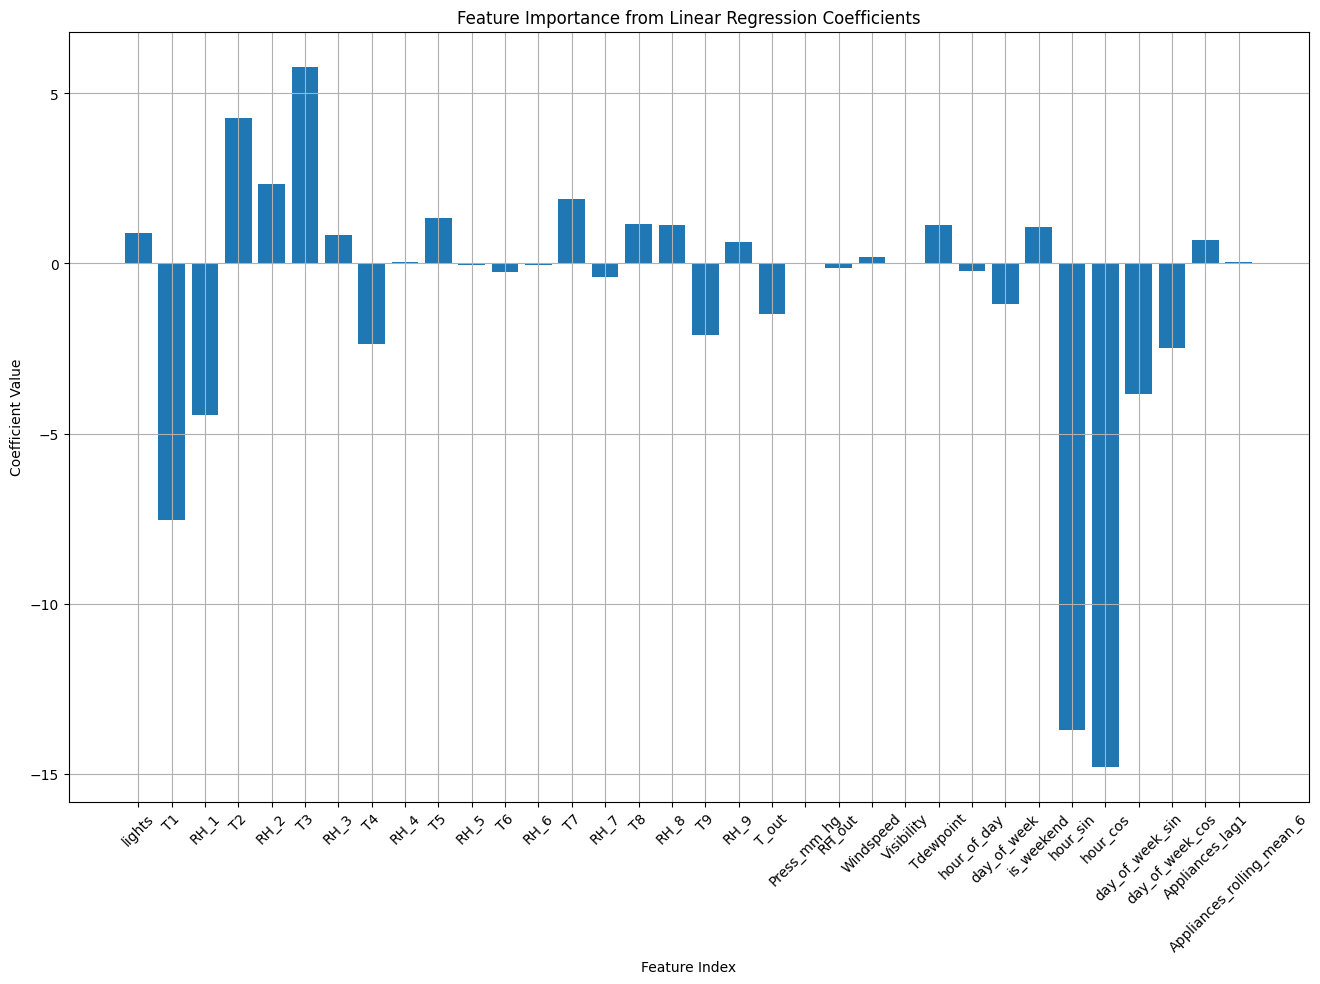

Mean Squared Error: 4445.101050250777
Mean Absolute Error: 30.299573576998515
R^2 Score: 0.5808457294128013


In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Coefficients: ", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Feature coefficients analysis
importance = lin_reg.coef_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.grid()
plt.show()

Support vector regression

In [22]:
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR Mean Absolute Error: {mae_svr}")
print(f"SVR R^2 Score: {r2_svr}")

SVR Mean Squared Error: 4588.646267183087
SVR Mean Absolute Error: 27.217821253757617
SVR R^2 Score: 0.567310021220937


Random forest regression

Random Forest Mean Squared Error: 4540.287369853691
Random Forest Mean Absolute Error: 30.300952705001702
Random Forest R^2 Score: 0.5718700611631922


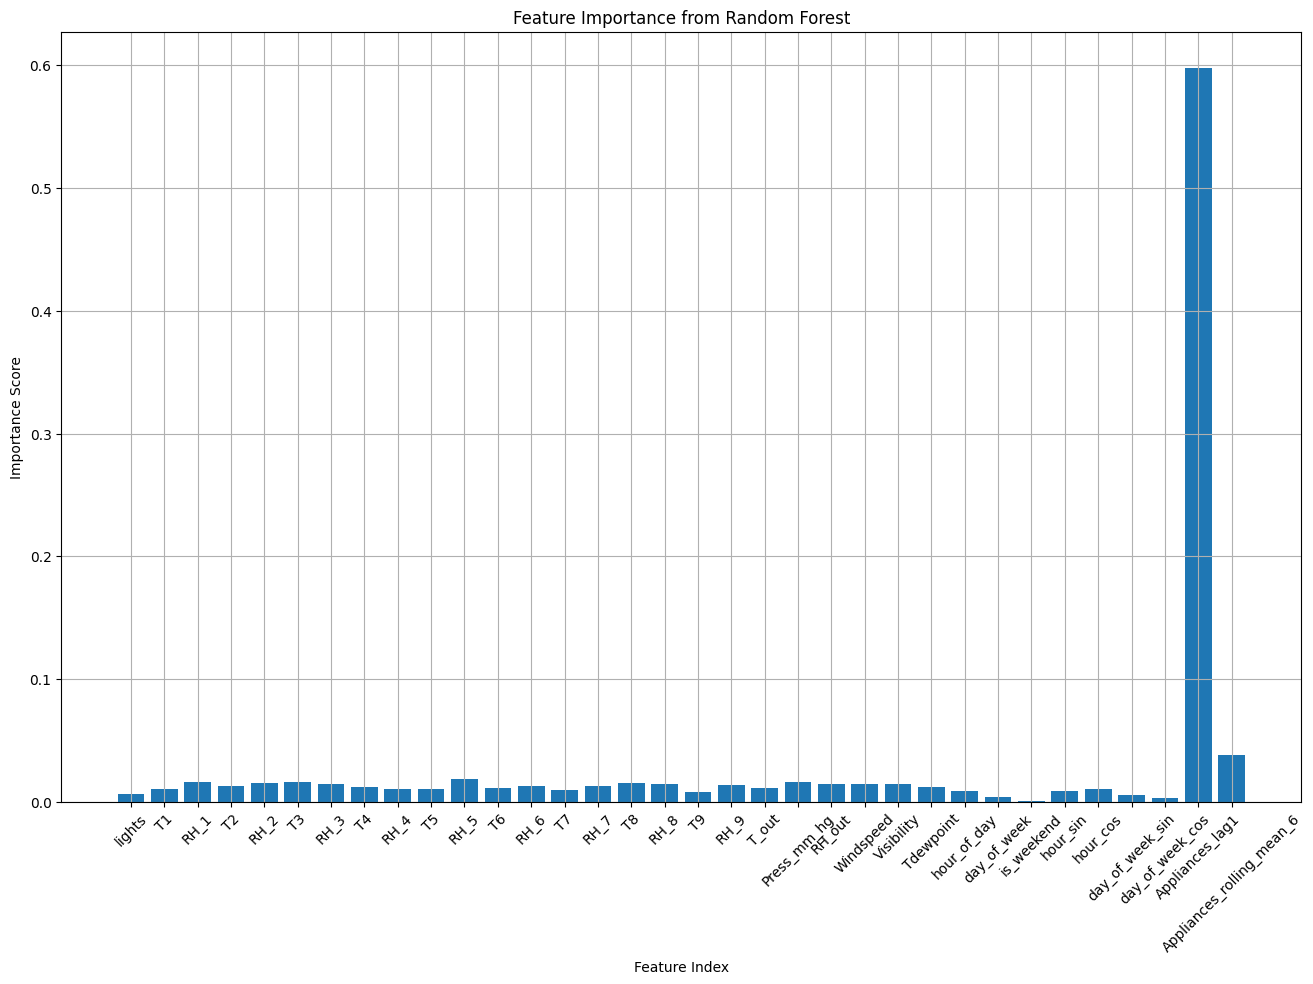

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

# Feature importance from Random Forest
importances = rf_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.grid()
plt.show()

XGBoost

In [26]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")

XGBoost Mean Squared Error: 4594.76611328125
XGBoost Mean Absolute Error: 30.438257217407227
XGBoost R^2 Score: 0.5667328834533691


Multi-layer Perceptron

In [30]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=100,
    early_stopping=True,
    learning_rate_init=0.001
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"MLP Mean Squared Error: {mse_mlp}")
print(f"MLP Mean Absolute Error: {mae_mlp}")
print(f"MLP R^2 Score: {r2_mlp}")

MLP Mean Squared Error: 4341.163151044729
MLP Mean Absolute Error: 29.901648656740367
MLP R^2 Score: 0.5906466346870737
